In [1]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(readr)
library(stringr)
library(ggbeeswarm)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
read_csv <- function(filename){
    df = read.csv(filename)
    df = df %>% mutate(Benchmark = sapply(strsplit(as.character(Benchmark), "/"), function(x) x[length(x)]))
    df
}

In [3]:
compute_speedup <- function(opt, O3){
    opt['Speedup'] = O3['Mean'] / opt['Mean']
    opt
}

In [4]:
inline <- function(df){
    df %>% gather("exec", "time", 2:6) %>% arrange(Benchmark)
}

In [20]:
O3 = read_csv('csvs/O3.csv') %>% mutate(type = "ORG")

In [22]:
store = read_csv('csvs/store.csv') %>% compute_speedup(O3) %>% mutate(type = "ESS")

In [24]:
load = read_csv('csvs/load.csv') %>% compute_speedup(O3) %>% mutate(type = "EAE")

In [25]:
intra = read_csv('csvs/intra.csv') %>% compute_speedup(O3) %>% mutate(type = "ALP")

In [27]:
inter = read_csv('csvs/inter.csv') %>% compute_speedup(O3) %>% mutate(type = "PLP")

In [28]:
# biggest speedups
inter %>% arrange(Speedup)

Benchmark,exec1,exec2,exec3,exec4,exec5,Mean,Speedup,type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
08-main,0.07,0.07,0.07,0.07,0.07,0.07,0.5714286,PLP
GlobalDataFlow-flt,1.80,1.80,1.80,1.80,1.81,1.80,0.7777778,PLP
Recurrences-flt,3.42,3.42,3.41,3.42,3.42,3.42,0.7982456,PLP
yacr2,0.68,0.68,0.68,0.68,0.68,0.68,0.8529412,PLP
LinearDependence-flt,1.72,1.72,1.72,1.71,1.71,1.72,0.8720930,PLP
mvt,10.02,9.95,9.91,9.92,10.02,9.96,0.9146586,PLP
Recurrences-dbl,2.98,2.98,2.98,2.98,2.98,2.98,0.9496644,PLP
bicg,7.50,7.42,7.41,7.55,7.42,7.46,0.9638070,PLP
LinearDependence-dbl,2.29,2.28,2.27,2.28,2.28,2.28,0.9868421,PLP


In [29]:
df = bind_rows(O3, store, load, intra, inter)

In [30]:
df %>% head

Benchmark,exec1,exec2,exec3,exec4,exec5,Mean,type,Speedup
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
correlation,11.79,11.75,11.79,11.84,11.80,11.79,ORG,NA
covariance,12.21,12.15,12.24,12.16,12.17,12.19,ORG,NA
gemm,10.12,10.13,10.08,10.22,10.20,10.15,ORG,NA
gemver,9.55,9.60,9.72,9.60,9.62,9.62,ORG,NA
gesummv,5.56,5.53,5.57,5.55,5.58,5.56,ORG,NA
symm,97.28,96.93,97.83,97.62,97.03,97.34,ORG,NA


In [45]:
options(repr.plot.width=7, repr.plot.height=5)

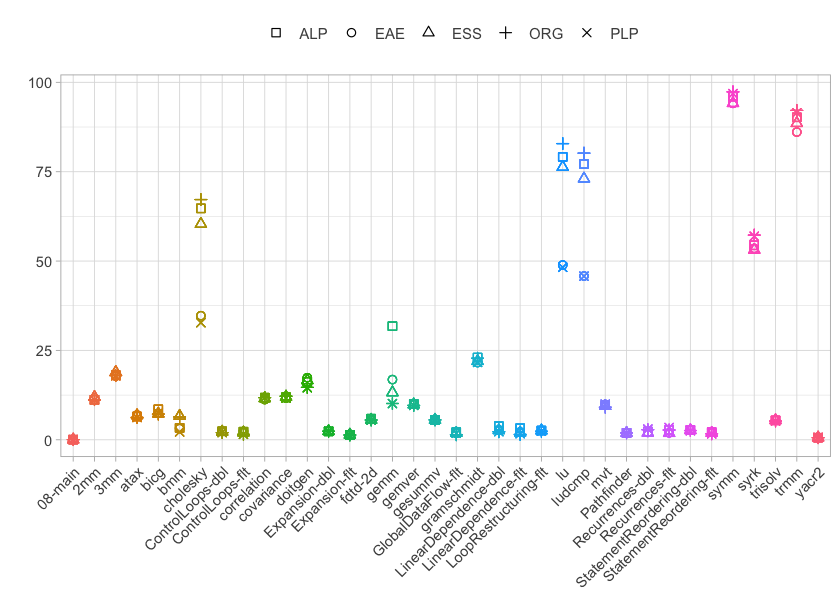

In [57]:
ggplot(data = df %>% inline, aes(x = Benchmark, y = Mean, group = type, shape = type)) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
#     theme(legend.position = "none") +
#     theme(axis.title.x=element_blank(), axis.text.x=element_blank()) +
#     theme(axis.title.x=element_blank(), axis.text.y=element_blank()) +
    scale_shape_manual(values = c(0, 1, 2, 3, 4)) +
    geom_point(aes(colour = Benchmark), stat = "identity", size = 2) +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1)) +
    guides(colour = FALSE) +
    ylab('')
#     ylab('Runtime (secs)') +
#     scale_x_discrete(labels = c('2mm', '3mm', 'atax', 'bicg', 'cholesky', 'corr',
#                                 'cov', 'doitgen', 'fdtd-2d', 'gemm', 'gemver',
#                                 'gesummv', 'gram', 'lu', 'ludcmp', 'mvt', 'symm',
#                                 'syrk', 'trisolv', 'trmm')) +
#     ggsave("time.pdf", device = "pdf", width = 8, height = 4)

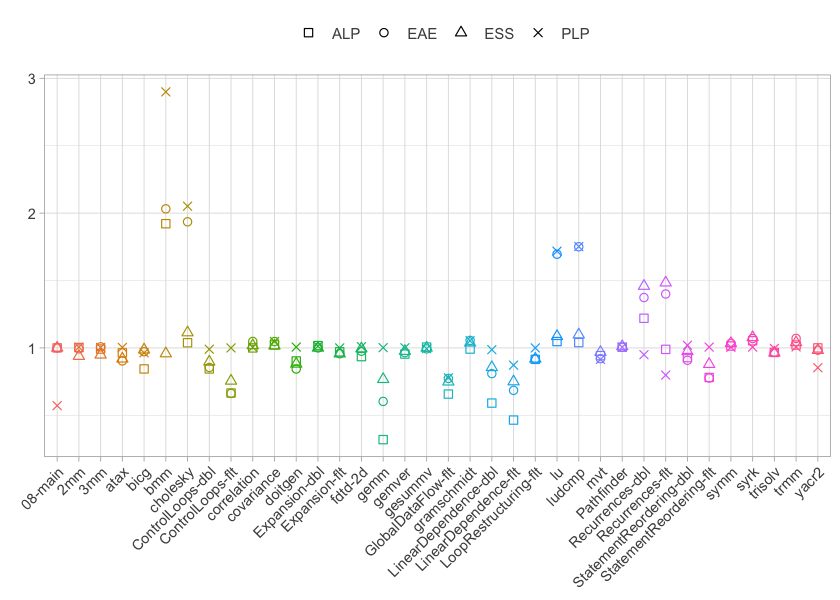

In [56]:
ggplot(data = df %>% filter(type != "ORG"), aes(x = Benchmark, y = Speedup, group = type, shape = type)) + 
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank()) +
    scale_shape_manual(values = c(0, 1, 2, 4)) +
    geom_point(aes(colour = Benchmark), stat = "identity", size = 2) +
#     theme(legend.position = "none") +
    guides(colour = F) +
#     ylab('Speedup') +
    ylab('') +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1))
#     scale_x_discrete(labels = c('2mm', '3mm', 'atax', 'bicg', 'cholesky', 'corr',
#                                 'cov', 'doitgen', 'fdtd-2d', 'gemm', 'gemver',
#                                 'gesummv', 'gram', 'lu', 'ludcmp', 'mvt', 'symm',
#                                 'syrk', 'trisolv', 'trmm')) +
#     ggsave('speedup.pdf', device = 'pdf', width = 8, height = 4)

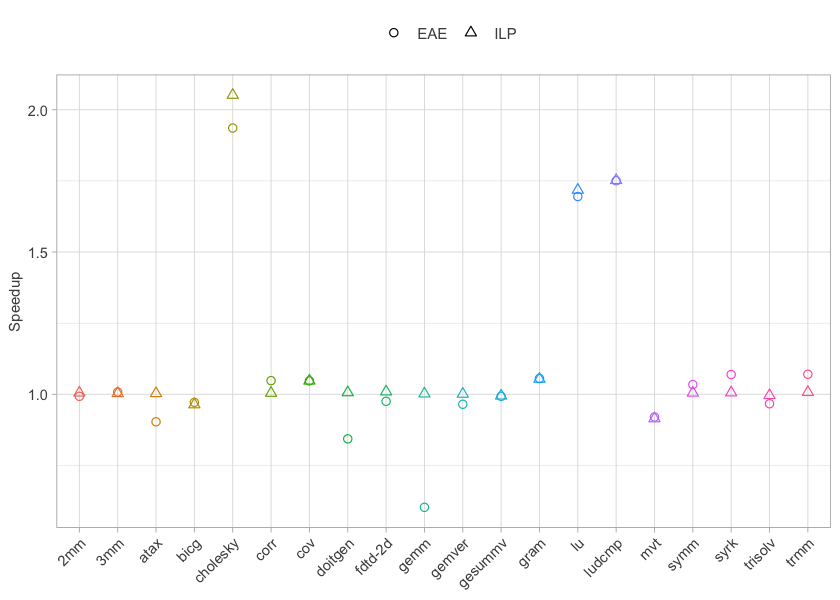

In [21]:
ggplot(data = df %>% filter(type == "ILP" | type == "EAE"), aes(x = Benchmark, y = Speedup, group = type, shape = type)) + 
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank()) +
    scale_shape_manual(values = c(1, 2)) +
    geom_point(aes(colour = Benchmark), stat = "identity", size = 2) +
#     theme(legend.position = "none") +
    guides(colour = F) +
    ylab('Speedup') +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1)) +
    scale_x_discrete(labels = c('2mm', '3mm', 'atax', 'bicg', 'cholesky', 'corr',
                                'cov', 'doitgen', 'fdtd-2d', 'gemm', 'gemver',
                                'gesummv', 'gram', 'lu', 'ludcmp', 'mvt', 'symm',
                                'syrk', 'trisolv', 'trmm')) +
    ggsave('speedup_big_2.png', device = 'png', width = 8, height = 4)

## Other benchmarks

In [5]:
sel = read.csv('../rq1-prevalence/sel.csv') %>% select(Name) %>% mutate(Benchmark = Name) %>% select(Benchmark)

In [6]:
ORG = read.csv('others/org.csv') %>% filter(Benchmark %in% sel$Benchmark) %>% mutate(type = 'ORG')
SSE = read.csv('others/sse.csv') %>% filter(Benchmark %in% sel$Benchmark) %>% compute_speedup(ORG) %>% mutate(type = 'SSE')
EAE = read.csv('others/eae.csv') %>% filter(Benchmark %in% sel$Benchmark) %>% compute_speedup(ORG) %>% mutate(type = 'EAE')

In [7]:
df = bind_rows(ORG, SSE, EAE)

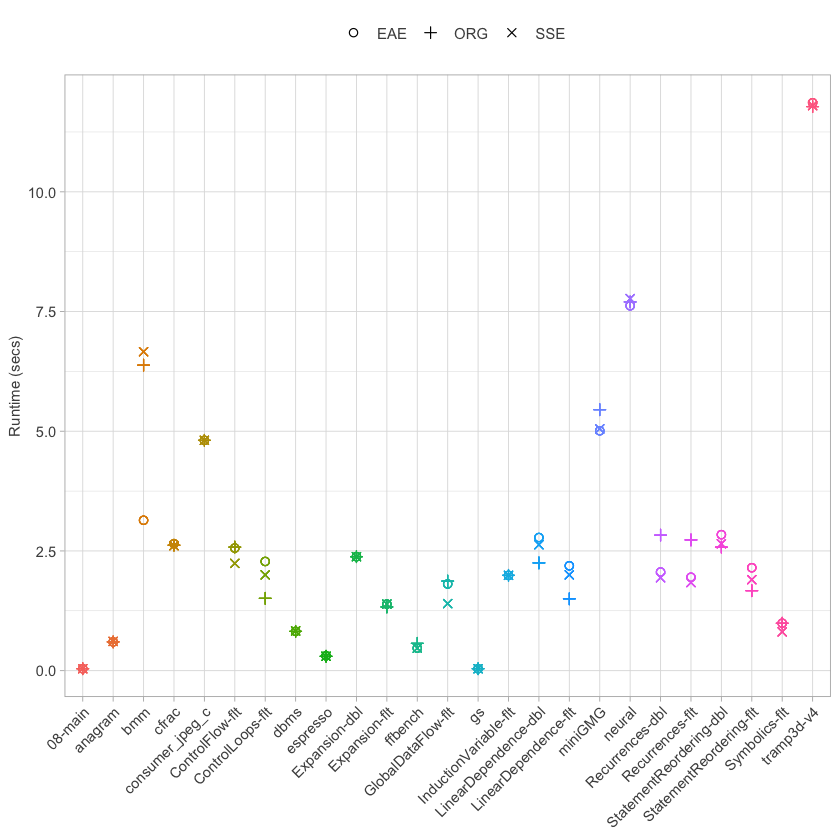

In [118]:
ggplot(data = df %>% inline, aes(x = Benchmark, y = Mean, group = type, shape = type)) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
#     theme(legend.position = "none") +
#     theme(axis.title.x=element_blank(), axis.text.x=element_blank()) +
#     theme(axis.title.x=element_blank(), axis.text.y=element_blank()) +
    scale_shape_manual(values = c(1, 3, 4)) +
    geom_point(aes(colour = Benchmark), stat = "identity", size = 2) +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1)) +
    guides(colour = FALSE) +
    ylab('Runtime (secs)') +
    ggsave("time_other_big.pdf", device = "pdf", width = 8, height = 4)

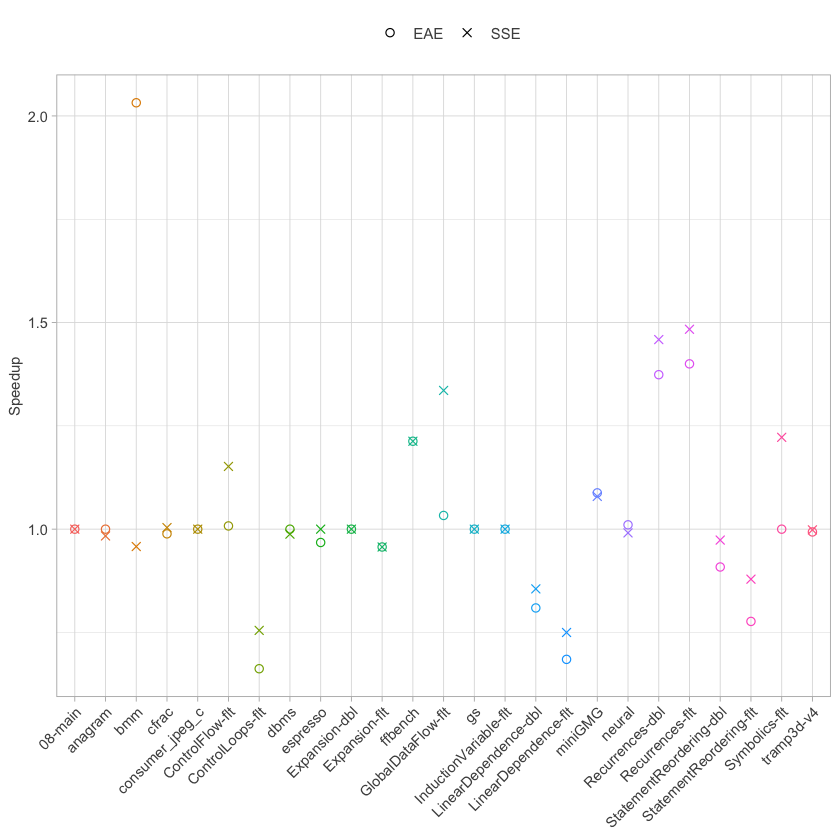

In [119]:
ggplot(data = df %>% filter(type != "ORG"), aes(x = Benchmark, y = Speedup, group = type, shape = type)) + 
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank()) +
    scale_shape_manual(values = c(1, 4)) +
    geom_point(aes(colour = Benchmark), stat = "identity", size = 2) +
#     theme(legend.position = "none") +
    guides(colour = F) +
    ylab('Speedup') +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1)) +
    ggsave('speedup_other_big.pdf', device = 'pdf', width = 8, height = 4)

In [15]:
eae_slow = df %>% filter(type == 'EAE' & Speedup < 1.0) %>% arrange(desc(Speedup))

In [16]:
sse_slow = df %>% filter(type == 'SSE' & Speedup < 1.0) %>% arrange(desc(Speedup))

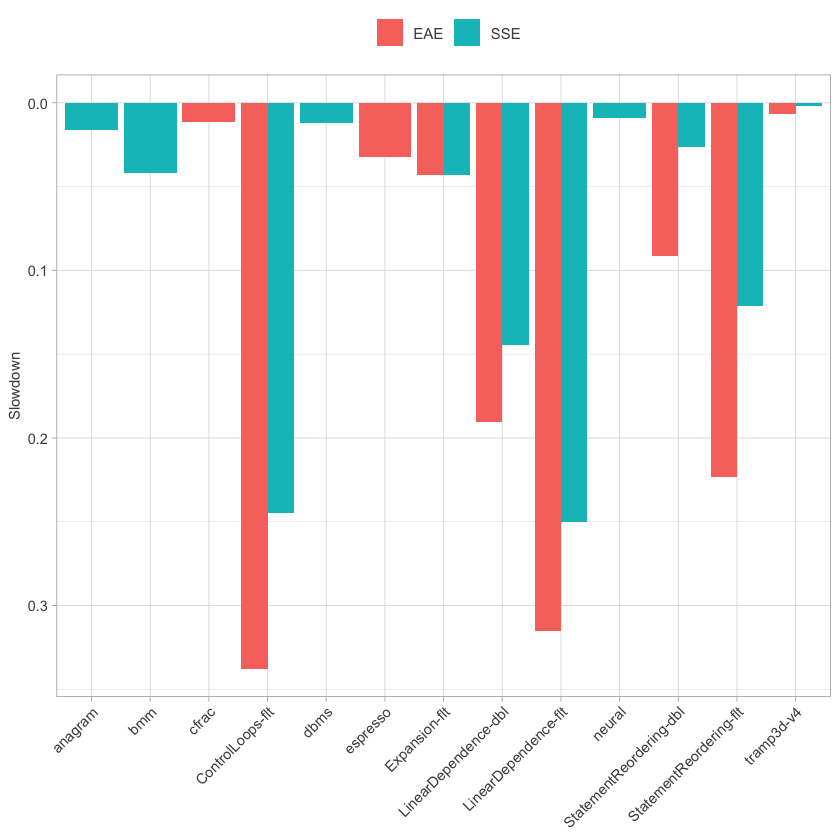

In [32]:
ggplot(df %>% filter(Speedup < 1.0 & type != 'ORG')) +
    geom_bar(aes(x = Benchmark, y = 1-Speedup, fill = type), position = 'dodge', stat = 'identity') +
    scale_y_reverse() +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank()) +
#     theme(legend.position = "none") +
    guides(colour = F) +
    ylab('Slowdown') +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1))